In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmnist-typeface-mnist/TMNIST_Data.csv


# **Abstract**

This Notebook tries to use a simple convolution neural network (CNN) to do image recognition on TMNIST typeface dataset. The goal is to find a  "Hello World"  Handwritten Digit Classification (MNIST) tutorial and create a similar tutorial for one of the TMNIST data sets.

# **About DataSet**

This dataset is inspired by the MNIST database for handwritten digits. It consists of images representing digits from 0-9 produced using 2,990 google fonts files.

The dataset consists of a single file: TMNIST_Data.csv

This file consists of 29,900 examples with labels and font names. Each row contains 786 elements: the first element represents the font name (ex-Chivo-Italic, Sen-Bold), the second element represents the label (a number from 0-9) and the remaining 784 elements represent the grayscale pixel values (from 0-255) for the 28x28 pixel image.

# **Importing Required Dependencies**

In [ ]:
import numpy as np 
import pandas as pd 
import re

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf 
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Activation, Dense, Conv2D, MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

# **Loading Data**

In [ ]:
df = pd.read_csv('../input/tmnist-typeface-mnist/TMNIST_Data.csv')
df

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29895,Raleway[wght],7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29896,Charm-Regular,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29897,BigShouldersStencilDisplay-Black,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29898,Gabriela-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Get the number of rows and columns in the dataset
print("Shape of the dataset:", df.shape)

# Get the column names
print("Column names:", df.columns)

Shape of the dataset: (29900, 787)
Column names: Index(['names', 'labels', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '776', '777', '778', '779', '780', '781', '782', '783', '784', 'group'],
      dtype='object', length=787)


In [ ]:
df['names'].value_counts()

GrandHotel-Regular          10
Laila-Regular               10
Tajawal-Medium              10
Numans-Regular              10
PT_Sans-Web-Italic          10
                            ..
Thasadith-Bold              10
CherryBomb-Regular          10
NotoSansOriyaUI-Thin        10
Kodchasan-SemiBoldItalic    10
AveriaSerifLibre-Ligh       10
Name: names, Length: 2990, dtype: int64

In [ ]:
df.labels.value_counts()

2    2990
8    2990
4    2990
3    2990
1    2990
6    2990
5    2990
9    2990
7    2990
0    2990
Name: labels, dtype: int64

In [ ]:
all_ = list(df['labels'].unique())

# Regex Pattern to check alphabets, digits and special symbols
pattern_numbers = re.compile(r"[0-9]")
pattern_symbols = re.compile(r"")

# Extracting Pattern
Numbers_ = pattern_numbers.findall(str(all_))
Symbols_ = list(set(pattern_symbols.findall(str(all_))))


# Creating Gropus
group = 1
for list_ in (Numbers_,Symbols_):
    df.loc[df['labels'].isin(list_), 'group'] = str(group)
    group += 1

**Defining X and y for training**

X = features used to predict the target variable

y = the target variable(labels) that is to be predicted

In [ ]:
X = df.iloc[:, 2:-1].astype('float32') 
y  = df[['labels']] 

In [ ]:
labels = y['labels'].unique()
values = [num for num in range(len(df['labels'].unique()))]
label_dict= dict(zip(labels,values)) #Creating Dictionary 
label_dict_inv = dict(zip(values,labels))
y['labels'].replace(label_dict, inplace=True) #Maping Values
print(label_dict)

{2: 0, 8: 1, 4: 2, 3: 3, 1: 4, 6: 5, 5: 6, 9: 7, 7: 8, 0: 9}


# **Split of Data into 80% training and 20% test data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

**Reshaping the Test and Train data and preping the input data**

In [ ]:
Length, Height = 28,28
NCl = y_train.nunique()[0] # Unique targets

# N of images 28x28
X_train = np.reshape(X_train.values, (X_train.shape[0] ,Length, Height)) 
X_test = np.reshape(X_test.values, (X_test.shape[0] ,Length, Height))

# Target into Categorical Values
y_train = to_categorical(y_train, NCl, dtype='int' )
y_test = to_categorical(y_test, NCl, dtype='int' )

print(f'X:Train, Test data shape:{X_train.shape},{X_test.shape}')
print(f'Y:Train, Test data shape:{y_train.shape},{y_test.shape}')

X:Train, Test data shape:(23920, 28, 28),(5980, 28, 28)
Y:Train, Test data shape:(23920, 10),(5980, 10)


**Visualizing the data in a grid**

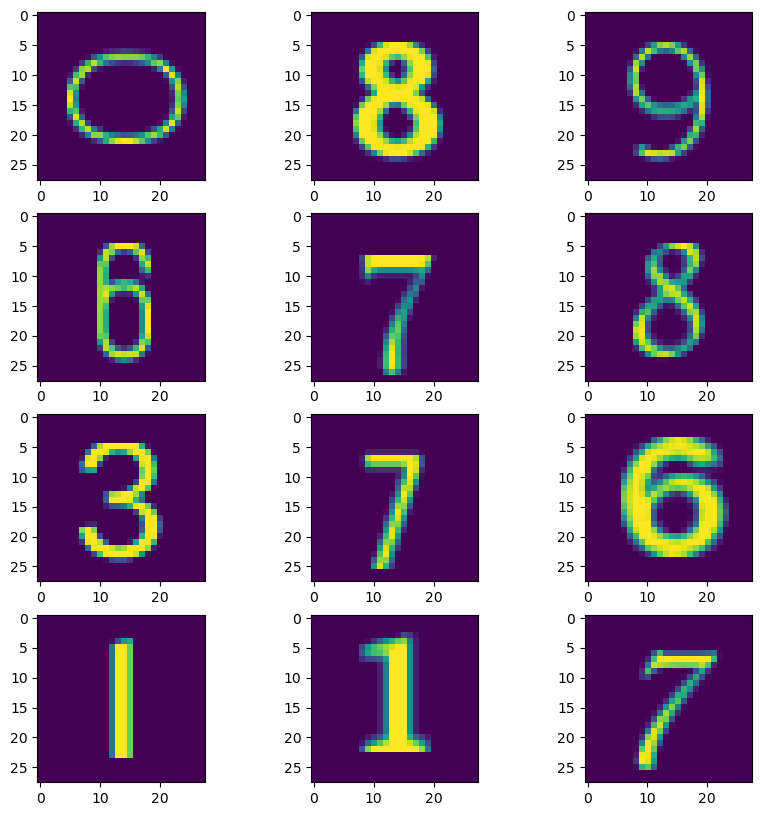

In [ ]:
random = shuffle(X_train[:500])
fig,ax = plt.subplots(4,3, figsize = (10,10)) 
axes = ax.flatten()
for i in range(12):
    img = np.reshape(random[i], (28,28)) # reshaping it for displaying
    axes[i].imshow(img)
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction

In [ ]:
RGB = 1  
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],X_train.shape[2], RGB)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],RGB)

**Normalizing the data**

Normalizing data by dividing the RGB codes with 255 (which is the maximum RGB code minus the minimum RGB code)

In [ ]:
X_train = X_train/255
X_test = X_test/255
print(f'Train, Test shapes: {X_train.shape},{X_test.shape}')

Train, Test shapes: (23920, 28, 28, 1),(5980, 28, 28, 1)


# **Convolutional Neural Network(CNN)**

CNN distinguishes meaningful features in an image in order to classify the image as a whole.

**Principles of CNN**

**Convolution**

A convolution sweeps the window through images then calculates its input and filter dot product pixel values. This allows convolution to emphasize the relevant features.


![](https://miro.medium.com/max/1400/1*VxQvrbcOaduumKYzoGLjOQ.png)

Look at this input. We will encase the window elements with a small window, dot multiplies it with the filter elements, and save the output. We will repeat each operation to derive 5 output elements as [0,0,0,1,0]. From this output, we can know that the feature change(1 becomes 0) in sequence 4. The filter has done well to identify the input values. Similarly, this happened for 2D Convolutions as well.
![](https://indoml.files.wordpress.com/2018/03/convolution-with-multiple-filters2.png)

**Max Pooling**

![](https://production-media.paperswithcode.com/methods/MaxpoolSample2.png)

CNN uses max pooling to replace output with a max summary to reduce data size and processing time. This allows you to determine features that produce the highest impact and reduces the risk of overfitting.
Max pooling takes two hyperparameters: stride and size. The stride will determine the skip of value pools while the size will determine how big the value pools in every skip.

**Activation Function (ReLU and Sigmoid)**

After each convolutional and max pooling operation, we can apply Rectified Linear Unit (ReLU). The ReLU function mimics our neuron activations on a “big enough stimulus” to introduce nonlinearity for values x>0 and returns 0 if it does not meet the condition. This method has been effective to solve diminishing gradients. Weights that are very small will remain as 0 after the ReLU activation function.

**The CNN Big Picture + Fully Connected Layer**

![](https://editor.analyticsvidhya.com/uploads/67201cnn.jpeg)

Finally, we will serve the convolutional and max pooling feature map outputs with Fully Connected Layer (FCL). We flatten the feature outputs to column vector and feed-forward it to FCL. We wrap our features with softmax activation function which assign decimal probabilities for each possible label which add up to 1.0. Every node in the previous layer is connected to the last layer and represents which distinct label to output.


Initializing Sequential Model.

**This CNN has 4 convolution layers and 3 fully connected layers.**

Convolution layers have 64 filters of 3x3 pixels. 
Since the image is 28x28 pixel, 3x3 should be a reasonable small

Using **BatchNormalization** to standardize the input, **max pooler** to make the result become smaller after filter, **relu** activation function in all convolutional layers

In [ ]:
model = Sequential ()

# Convolution layer 1
model.add(Conv2D(filters = 64 , kernel_size = (3,3),input_shape = (Length, Height, RGB), padding = 'same',))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))

# Convolution layer 2
model.add(Conv2D(filters = 64 , kernel_size = (3,3) ,padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))

# Convolution layer 3
model.add(Conv2D(filters = 128 , kernel_size = (3,3) ,padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))

# Convolution layer 4
model.add(Conv2D(filters = 128 , kernel_size = (3,3) ,padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))

# Fully connected layer 1
model.add(Flatten()) # Flatten from 2D to 1D
model.add(Dense(256)) # With 256 nodes
model.add(BatchNormalization())
model.add(Activation('relu')) # Use relu activation function

# Fully connected layer 2, reduce the node number to make it more close to the result patterns (94)
model.add(Dense(180)) # With 180 nodes
model.add(BatchNormalization())
model.add(Activation('relu')) # Use relu activation function

# Last fully connected layer 3
model.add(Dense(NCl, activation = 'softmax')) # The output should have 94 nodes (NCL), use softmax activation function

# See the info of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       2

**Giving batch = 64 and Epochs = 100 to train the model**

In [ ]:
optimizer  = Adam(learning_rate=0.01)
callback =EarlyStopping(monitor='loss', patience=5)
Batch_ = 64
Epochs_ = 100

model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

# **Train the CNN with training data**

In [ ]:
history= model.fit(X_train,y_train, validation_data = (X_test,y_test),batch_size = Batch_ ,
                   epochs = Epochs_, verbose = 1)

Epoch 1/100
374/374 [==============================] - 35s 86ms/step - loss: 0.1178 - accuracy: 0.9647 - val_loss: 0.2447 - val_accuracy: 0.9109
Epoch 2/100
374/374 [==============================] - 32s 86ms/step - loss: 0.0532 - accuracy: 0.9845 - val_loss: 0.1531 - val_accuracy: 0.9517
Epoch 3/100
374/374 [==============================] - 32s 86ms/step - loss: 0.0384 - accuracy: 0.9887 - val_loss: 0.0521 - val_accuracy: 0.9848
Epoch 4/100
374/374 [==============================] - 32s 86ms/step - loss: 0.0376 - accuracy: 0.9883 - val_loss: 0.0532 - val_accuracy: 0.9860
Epoch 5/100
374/374 [==============================] - 32s 86ms/step - loss: 0.0306 - accuracy: 0.9910 - val_loss: 0.0377 - val_accuracy: 0.9895
Epoch 6/100
374/374 [==============================] - 33s 88ms/step - loss: 0.0271 - accuracy: 0.9912 - val_loss: 0.0314 - val_accuracy: 0.9900
Epoch 7/100
374/374 [==============================] - 32s 86ms/step - loss: 0.0258 - accuracy: 0.9921 - val_loss: 0.1628 - val_ac

**Testing the accuracy of model on test data**

The test accuracy we got is 99.6%

In [ ]:
score = model.evaluate(X_test,y_test, batch_size = Batch_,verbose = 0)
print(f"Test Accuracy:{round(score[1],4)*100}%")

Test Accuracy:99.4%


**Graph the Model Performance**

From the graph it can be observed that there is variation of val_accuracy and val_loss initially but seems to be accurate towards the end of the plot

<AxesSubplot:>

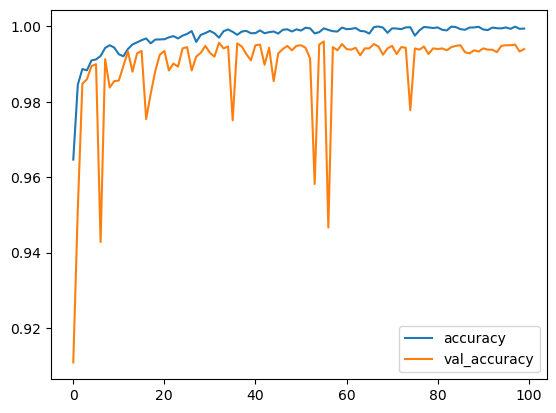

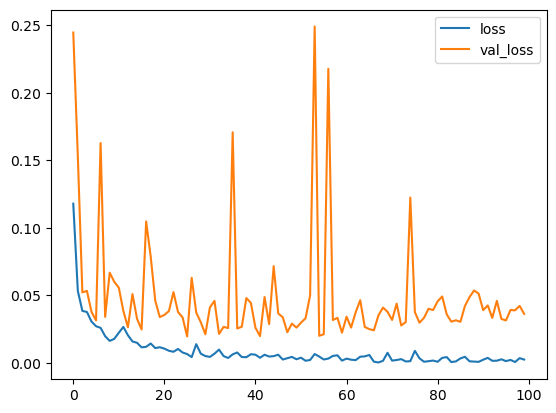

In [ ]:
his = pd.DataFrame(history.history)
his.loc[:, ['accuracy', 'val_accuracy']].plot()
his.loc[:, ['loss', 'val_loss']].plot()

# **Using Trained Model to Predict the labels**

The model predictions on random train data are pretty good as observed. All 12 prediction are accurate

1/1 [==============================] - 0s 19ms/step


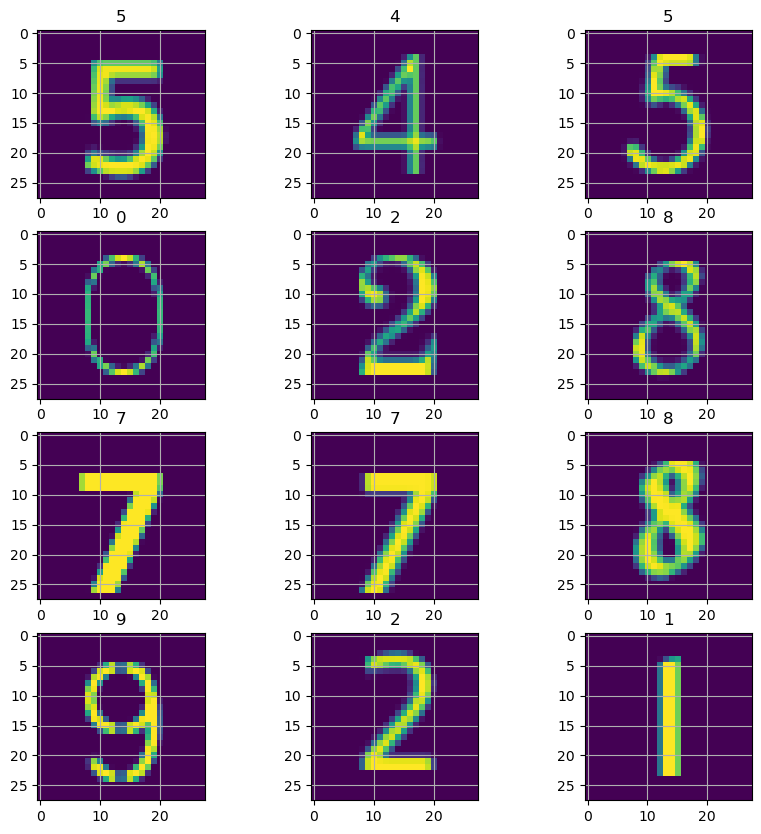

In [ ]:
fig, axes = plt.subplots(4,3, figsize=(10,10))
axes = axes.flatten()
random = shuffle(X_train[:500])


for i,ax in enumerate(axes):
    img = np.reshape(random[i], (28,28)) # reshaping it for displaying
    axes[i].imshow(img)
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    pred = label_dict_inv[np.argmax(model.predict(img_final))]
    ax.set_title(pred)
    ax.grid()

# **Conclusion**

Sequential Model is used in this Notebook to predict the labels of TMNIST Typeface dataset.

The Model predictions were 100% accurate(12 out of 12 predictions were correct).

The accuracy of the model on test data is 99.6%

# **References**

https://www.kaggle.com/datasets/nimishmagre/tmnist-typeface-mnist

https://www.kaggle.com/code/yiweihe01/tmnist-alphabet-cnn

https://www.turing.com/kb/mathematical-formulation-of-feed-forward-neural-network

https://towardsdatascience.com/feed-forward-neural-networks-how-to-successfully-build-them-in-python-74503409d99a

https://pyimagesearch.com/2021/05/06/implementing-feedforward-neural-networks-with-keras-and-tensorflow/

https://www.kaggle.com/code/swamita/building-cnns-from-scratch-in-pytorch

https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracy

https://www.kaggle.com/datasets/nimishmagre/tmnist-typeface-mnist/code?select=TMNIST_Data.csv

# **License**

Copyright (c) 2023 Naman Diwan Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.